In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from joblib import load

In [36]:
X, y = load('../../preprocessing/clustering_data.joblib')

In [37]:
X.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
0,1.000000,0.00000,0.0,0.0,0.0,1.000,1.0,0.000,0.0,0.050000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.891594,0.00000,0.0,0.0,0.0,1.000,1.0,0.800,0.6,0.007500,...,0.0,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0
2,0.548717,0.00000,0.0,0.0,0.0,0.782,0.8,0.588,0.4,0.009375,...,0.0,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0
3,0.434425,0.00000,0.0,0.0,0.0,0.782,0.8,0.588,0.4,0.009375,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.999829,0.03125,0.0,0.0,0.0,1.000,1.0,0.384,0.0,0.229375,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
from sklearn.decomposition import PCA

In [39]:
pca = PCA(n_components=2)

X_pca = pca.fit_transform(X)

In [40]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

In [41]:
covariances = ['full', 'tied', 'diag', 'spherical']
silhouettes_cov = []

for covariance in covariances:
    gauss = GaussianMixture(n_components=2, covariance_type=covariance, random_state=55)
    gauss.fit(X)
    labels = gauss.predict(X)

    silhouettes_cov.append(silhouette_score(X, labels))

Text(0, 0.5, 'Silhouette score')

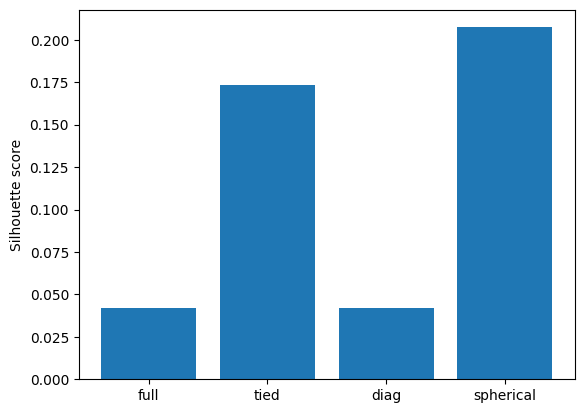

In [42]:
plt.bar(covariances, silhouettes_cov)
plt.ylabel('Silhouette score')

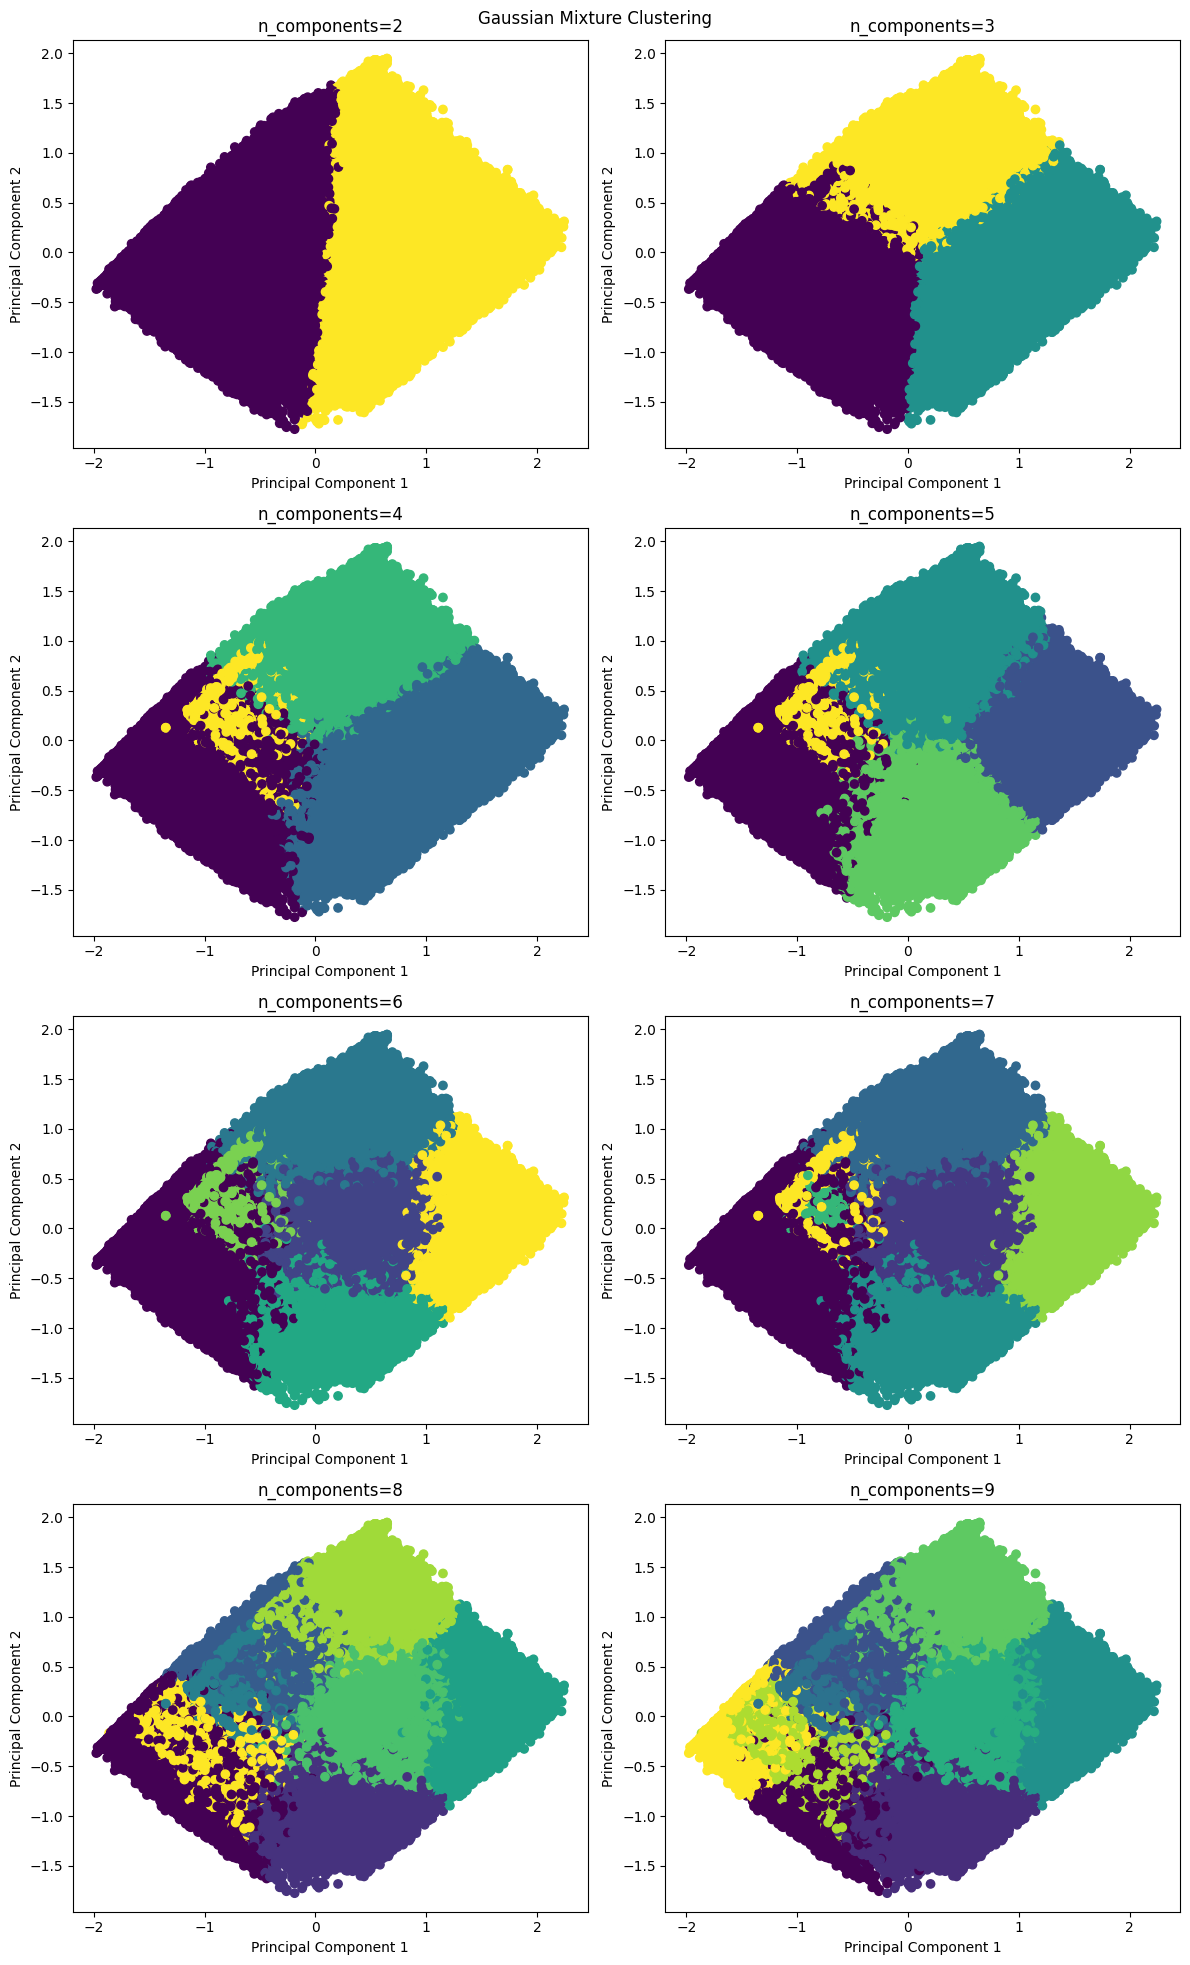

In [43]:
n_components = [i for i in range(2, 10)]
silhouettes_spherical = []

fig, axs = plt.subplots(4, 2, figsize=(12, 20))
fig.suptitle("Gaussian Mixture Clustering")

for n, ax in zip(n_components, axs.flatten()):
    gauss = GaussianMixture(n_components=n, covariance_type='spherical', random_state=55)
    gauss.fit(X)
    labels = gauss.predict(X)

    ax.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
    ax.set_title(f"n_components={n}")
    ax.set_xlabel("Principal Component 1")
    ax.set_ylabel("Principal Component 2")

    silhouettes_spherical.append(silhouette_score(X, labels))

plt.tight_layout()
plt.show()

In [44]:
silhouettes_spherical

[0.20737313832614657,
 0.1706123198860618,
 0.2067715733050177,
 0.20820410969142372,
 0.20246410582985155,
 0.14345110163035413,
 0.17592915959103603,
 0.1756110640949201]

Text(0, 0.5, 'Silhouette score')

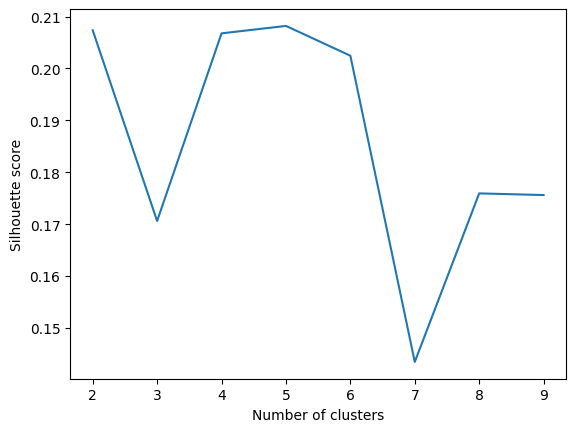

In [45]:
plt.plot(n_components, silhouettes_spherical)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')

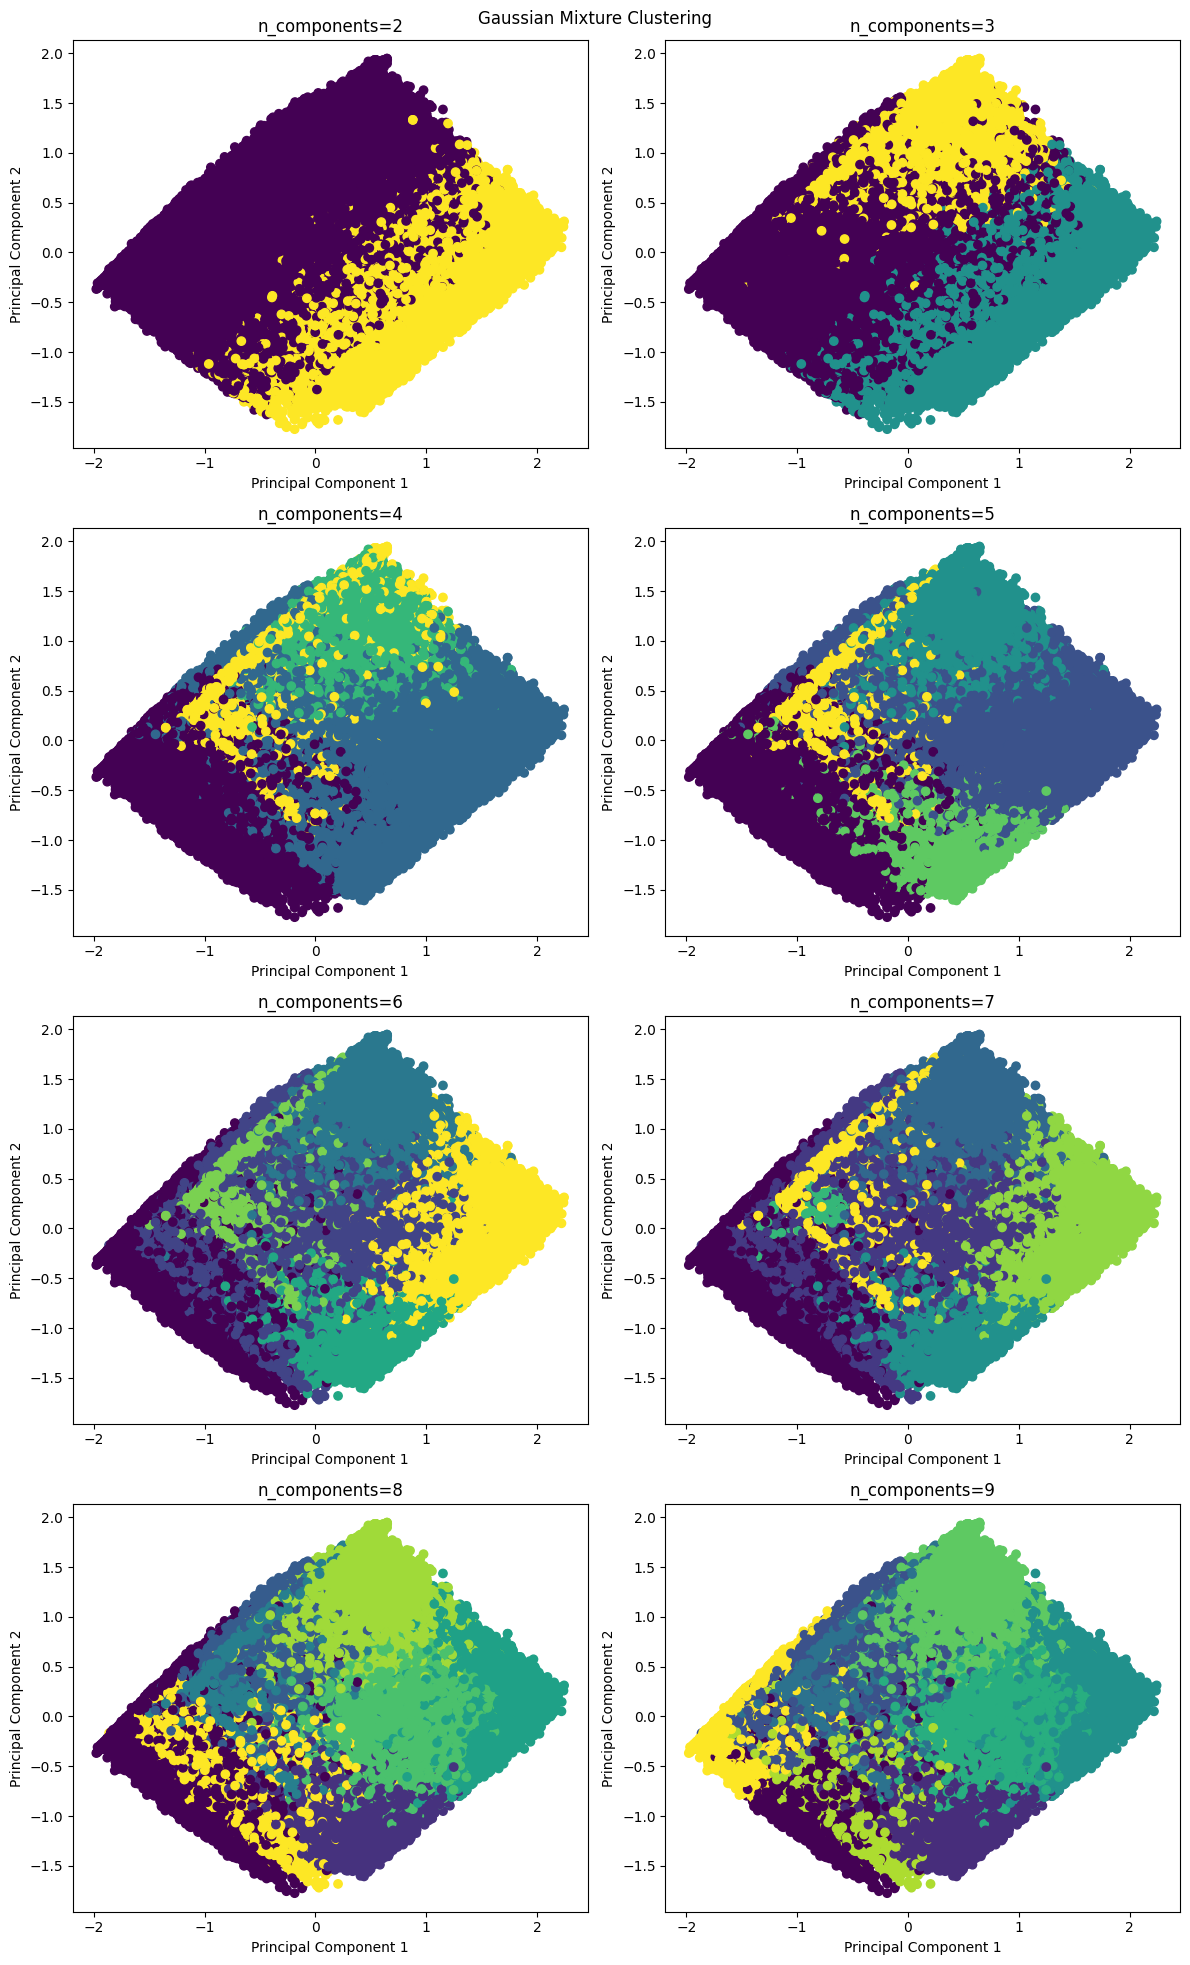

In [46]:
silhouettes_tied = []

fig, axs = plt.subplots(4, 2, figsize=(12, 20))
fig.suptitle("Gaussian Mixture Clustering")

for n, ax in zip(n_components, axs.flatten()):
    gauss = GaussianMixture(n_components=n, covariance_type='tied', random_state=55)
    gauss.fit(X)
    labels = gauss.predict(X)

    ax.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
    ax.set_title(f"n_components={n}")
    ax.set_xlabel("Principal Component 1")
    ax.set_ylabel("Principal Component 2")

    silhouettes_tied.append(silhouette_score(X, labels))

plt.tight_layout()
plt.show()

In [47]:
silhouettes_tied

[0.17329598357647222,
 0.11909912698421452,
 0.1772245692992075,
 0.18558668467696932,
 0.1882449654493508,
 0.12177481992592576,
 0.16670576866048842,
 0.1636465256649925]

Text(0, 0.5, 'Silhouette score')

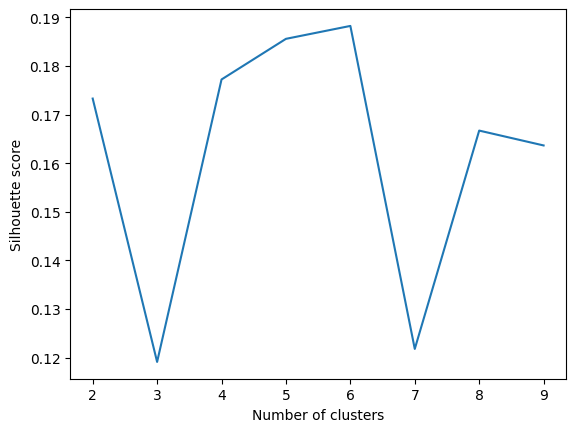

In [48]:
plt.plot(n_components, silhouettes_tied)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')

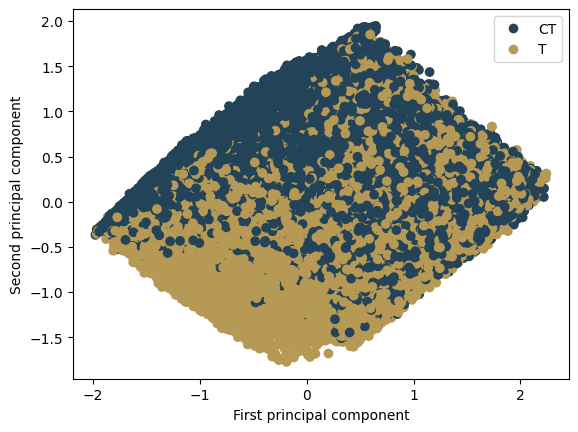

In [49]:
color_mapping = {0: '#234359', 1: '#b59955'}
colors = [color_mapping[team] for team in y]

scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=colors, label=colors)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='CT', markerfacecolor='#234359', markersize=8),
    plt.Line2D([0], [0], marker='o', color='w', label='T', markerfacecolor='#b59955', markersize=8)
]
plt.legend(handles=legend_elements)
plt.show()

In [50]:
def clustering_score(real, predicted):
    total = len(real)
    correct = sum(a == b for a, b in zip(real, predicted))
    score = (correct / total) * 100
    return score

In [66]:
gauss = GaussianMixture(n_components=2, covariance_type='spherical', random_state=55)
gauss.fit(X)
labels = gauss.predict(X)

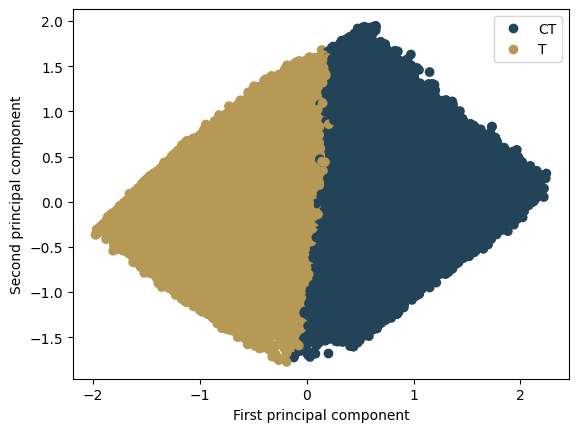

In [67]:
color_mapping = {1: '#234359', 0: '#b59955'}
colors = [color_mapping[team] for team in labels]

scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=colors, label=colors)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='CT', markerfacecolor='#234359', markersize=8),
    plt.Line2D([0], [0], marker='o', color='w', label='T', markerfacecolor='#b59955', markersize=8)
]
plt.legend(handles=legend_elements)
plt.show()

In [68]:
clustering_score(y, labels)

49.383109455175344

In [69]:
gauss = GaussianMixture(n_components=2, covariance_type='tied', random_state=55)
gauss.fit(X)
labels = gauss.predict(X)

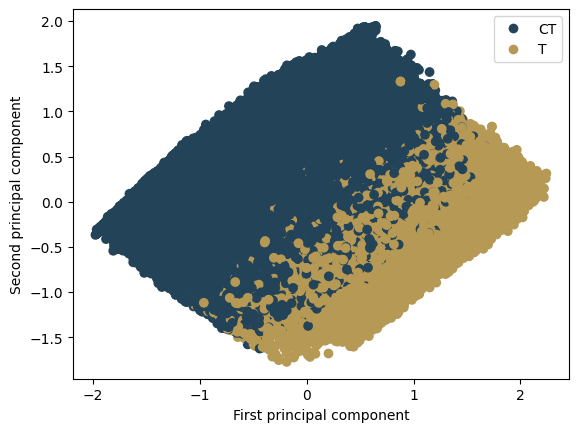

In [70]:
color_mapping = {0: '#234359', 1: '#b59955'}
colors = [color_mapping[team] for team in labels]

scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=colors, label=colors)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='CT', markerfacecolor='#234359', markersize=8),
    plt.Line2D([0], [0], marker='o', color='w', label='T', markerfacecolor='#b59955', markersize=8)
]
plt.legend(handles=legend_elements)
plt.show()

In [71]:
clustering_score(y, labels)

54.654868124325915